# Information Retrieval in High Dimensional Data
## Assignment 3

### Group 05

| Name  | Matriculation Number  | E-mail  |
| :------- | :----------------------- | :--------- |
| Akbar, Uzair   | 03697290 | [uzair.akbar@tum.de](mailto:uzair.akbar@tum.de) |
| Decker, Thomas | 03694815 | [thomas.decker@tum.de](mailto:thomas.decker@tum.de) |
| Hertel, Nico   | 03662493 | [mail@nicohertel.de](mailto:mail@nicohertel.de) |
| Liao, Zhenchen | 03700198 | [ge56cun@tum.de](mailto:ge56cun@tum.de) |
| Siriya, Seth   | 03707539 | [seth.siriya@tum.de](mailto:seth.siriya@tum.de) |

## The Kernel Trick
### Task 1
This Jupyter-Notebook contains a function for dimensionality reduction via PCA. The function `linear_pca` expects a data matrix $\mathbf{X}\in \mathbb{R}^{p\times N}$ and a number of PCs $k$ and returns the first $k$ PCA scores for the matrix $\mathbf{X}$.

In [1]:
import numpy as np

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    return S

#### *Part A*
Provide code that tests the function with selected images from the provided MNIST training dataset by visualizing the first $2$ scores in a scatter plot.

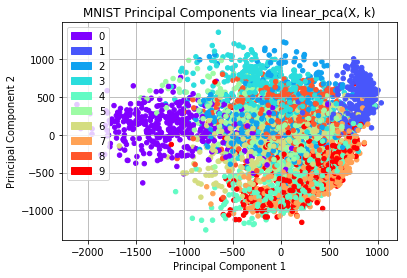

In [3]:
# Insert Code for Subtask 1.1 here

# Additional imports
import imageio
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
%matplotlib inline

# Set number of classes
directory = 'mnist'
num_classes = len(listdir(directory))
digit_prefix=['d%d' % i for i in range(0, num_classes)]

# Sample colors from spectrum to represent each class
colors = cm.rainbow(np.linspace(0, 1, num_classes))

# Find number of samples in each class
n = np.zeros(num_classes)
for i, dp in enumerate(digit_prefix):
    class_samples = listdir(directory + '/' + dp)
    n[i] = 400
    # uncomment the following line for reading entire dataset
    # n[i] = len(class_samples)

N = int(sum(n))        # Total #samples
X = np.zeros((784,N))  # Data matrix
Y = np.zeros(N)        # Label vector
C = np.zeros((N, 4))   # Color vector

# Read data and populate X, Y and C
for i, dp in enumerate(digit_prefix):
    Y[int(sum(n[:i])):int(sum(n[:i+1]))] = i
    C[int(sum(n[:i])):int(sum(n[:i+1])), :] = np.expand_dims(colors[i],axis=0)
    for j in range(int(n[i])):
        X[:, int(sum(n[:i]))+j] = np.float64(imageio.imread('mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())

# Get first k principal components of data
k = 2
S = linear_pca(X, k)

# Randomize order of data for plotting
# (so one class is not entirely covered by another)
idx_new = np.arange(N)
np.random.shuffle(idx_new)

# First 2 principal components
PC1 = S[0, idx_new]
PC2 = S[1, idx_new]

# Plot the first 2 principal components of data
plt.scatter(PC1, PC2, c=C[idx_new, :], s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via linear_pca(X, k)')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()

#### *Part B*
Complete the function `gram_pca` such that it has the same functionality as `linear_pca` but expects a gram matrix $\mathbf{K}=\mathbf{X}^T\mathbf{X}$ instead of the data matrix $\mathbf{X}$ as its input. Do not assume that $\mathbf{K}$ was produced from centered data. Note: It is important to be consistent in notation here. E.g., for a data matrix of $1000$ MNIST images, we have $\mathbf{X}\in \mathbb{R}^{784 \times 1000}$ and $\mathbf{K}\in \mathbb{R}^{1000 \times 1000}$.

In [4]:
def gram_pca(K,k):
    # Insert Code for Subtask 1.2 here
    
    # Center gram matrix K
    N = len(K)                  # Dimension of K = #samples
    I = np.eye(N)               # NxN identity matrix
    A = np.full((N, N), 1./N)   # NxN matrix with values 1/N
    K_c = (I - A) @ K @ (I - A) # Centered gram matrix
    
    # SVD of K_c and principal components
    [V, Sigma2, VT] = np.linalg.svd(K_c, full_matrices = False)
    Sigma = np.sqrt(Sigma2)
    S = np.expand_dims(Sigma[:k], axis = 1) * VT[:k, :]
    
    return S

#### *Part C*
Test your implementation and show that `gram_pca(np.dot(X.T, X), k)` yields results equivalent to those of `liear_pca(X, k)`.

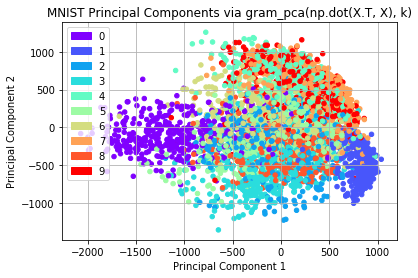

In [5]:
# Insert Code for Subtask 1.3 here

# Get first k principal components of data via gram_pca
k = 2
K = np.dot(X.T, X)
S_gram = gram_pca(K, k)

# First 2 principal components via gram_pca
PC1_gram = S_gram[0, idx_new]
PC2_gram = S_gram[1, idx_new]

# Plot the first 2 gram principal components of data
plt.scatter(PC1_gram, PC2_gram, c=C[idx_new, :], s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via gram_pca(np.dot(X.T, X), k)')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()

#### *Part D*
There is an unknown vector space $\mathbb{H}$, equipped with an inner product $\langle . , .\rangle_{\mathbb{H}}$ and a function

$$
\varphi : \mathbb{R}^p \rightarrow \mathbb{H},
$$

such that

$$
\langle \varphi(\mathbf{x}) , \varphi(\mathbf{y}) \rangle_\mathbb{H} = \exp{(-\frac{{\|\mathbf{x}-\mathbf{y}\|}^2}{2\sigma^2})}
$$
holds for every $\mathbf{x}, \mathbf{y} \in \mathbb{R}^p$. The expression on the right-hand side of the equation is called the *Gaussian kernel* and $\sigma$ is a parameter to choose by hand.

The function `gaussian_kernel_pca` expects a data matrix $\mathbf{X}$, a reduced dimension number $k$ and a parameter $\sigma$. It returns the first $k$ *Kernel PCA* scores of the data. In other words, the function returns the first $k$ PCA scores of

$$
\varphi(\mathbf{x}_1), \varphi(\mathbf{x}_2), ..., \varphi(\mathbf{x}_N),
$$

where $\mathbf{x}_i$ denotes the $i$-th data sample/ $i$-th column of the data matrix. The function `gaussian_kernel_pca` is already written, but for it to work, the function `compute_gaussian_gram_matrix` must return correct results. Complete `compute_gaussian_gram_matrix` accordingly.

In [6]:
def compute_gaussian_gram_matrix(X, sigma):
    #Insert Code for Subtask 1.4 here
    
    # get all pair-wise differences in data
    pair_diff = X.T[...,np.newaxis] - X[np.newaxis,...]
    
    # take the squared norm for each of them
    sq_norm = np.sum(pair_diff*pair_diff, axis=1)
    
    # plug each squared norm into the gaussian kernel
    K = np.exp(-sq_norm/(2*(sigma**2)))
    
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

#### *Part E*
Test `gaussian_kernel_pca` with some MNIST train images and $\sigma = 1000$.

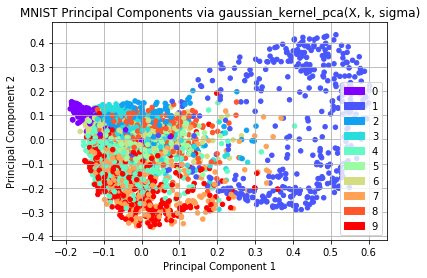

In [7]:
#Insert Code for Subtask 1.5 here

# Get first k principal components of data via gaussian_kernel_pca
k = 2
sigma = 1000
S_gauss = gaussian_kernel_pca(X, k, sigma)

# First 2 principal components via gaussian_kernel_pca
PC1_gauss = S_gauss[0, idx_new]
PC2_gauss = S_gauss[1, idx_new]

# Plot the first 2 gaussian-kernel principal components of data
plt.scatter(PC1_gauss, PC2_gauss, c=C[idx_new, :], s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Principal Components via gaussian_kernel_pca(X, k, sigma)')
legend_patch = [mpatches.Patch(color=colors[i], label=str(i)) for i in range(0, num_classes)]
plt.legend(handles=legend_patch)
plt.grid()
plt.show()